In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import itertools
import json

In [2]:
data = pd.read_csv("youtube-comments.csv",error_bad_lines=False,usecols =["Comment"])
data.head()

c:\Users\mylie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Comment
0,your site is safe for buying products please r...
1,Bro I have ordered DIY Peltier cooling kit how...
2,Your web site real or fake please tell your se...
3,"Hello Sir! We are a 100% genuine website, and ..."
4,Sir plzz send the mini dron making parts plzz ...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  226 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [4]:
data[data['Comment'].duplicated(keep=False)].sort_values('Comment').head(8)

,Comment
89,:)
94,:)
123,:)
140,Glad you liked it! :)
158,Glad you liked it! :)
155,Glad you liked it! :)
152,Glad you liked it! :)
149,Glad you liked it! :)


In [5]:
data = data.drop_duplicates('Comment')

In [7]:
# Define a list of punctuation marks
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', "%"]

# Combine the punctuation marks with the built-in English stop words
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

# Your data and vectorization code
desc = data['Comment'].values
vectorizer = TfidfVectorizer(stop_words='english')  # Use 'english' here
X = vectorizer.fit_transform(desc)

In [9]:
word_features = vectorizer.get_feature_names_out()
print(len(word_features))
print(word_features[100:300])

730
['cause' 'causes' 'central' 'change' 'channel' 'check' 'cheers' 'chip'
 'circuit' 'clarification' 'class' 'classification' 'clear' 'cli' 'cnn'
 'code' 'com' 'combine' 'come' 'comes' 'command' 'community' 'complete'
 'component' 'components' 'compute' 'computer' 'concise' 'concurrently'
 'confused' 'confusing' 'congrats' 'congratulations' 'connect' 'connected'
 'connecting' 'connection' 'consider' 'constant' 'contacted' 'contain'
 'content' 'continuously' 'control' 'controlled' 'conversion' 'convert'
 'converting' 'cooling' 'core' 'corectly' 'correct' 'country' 'cpp'
 'create' 'crypto' 'ct' 'current' 'cute' 'd13' 'daemon' 'danny' 'data'
 'datasheets' 'deals' 'debug' 'decide' 'deference' 'delay' 'delete'
 'deliver' 'delivery' 'dense' 'dependencies' 'deploy' 'described'
 'description' 'design' 'detailed' 'details' 'detect' 'device' 'did'
 'didn' 'directly' 'discount' 'discounts' 'discover' 'display' 'diy'
 'docs' 'documentation' 'does' 'doing' 'domains' 'don' 'dont' 'doubt'
 'drive' '

In [10]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [14]:

vectorizer2 = TfidfVectorizer(tokenizer=tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names_out()
print(len(word_features2))
print(word_features2[:50])

768
['a' 'abl' 'about' 'absolut' 'accelar' 'accord' 'acer' 'achiev' 'across'
 'activ' 'actual' 'ad' 'adaptor' 'adc' 'add' 'advertis' 'advic' 'affect'
 'after' 'again' 'ai' 'all' 'allow' 'alreadi' 'also' 'alway' 'am' 'amaz'
 'amazon' 'an' 'analysi' 'and' 'ani' 'anoth' 'anubhav' 'anymor' 'anyon'
 'anyway' 'anywher' 'app' 'appdata' 'applic' 'appreci' 'arduino' 'are'
 "aren't" 'around' 'as' 'ask' 'assign']


c:\Users\mylie\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
# vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
# X3 = vectorizer3.fit_transform(desc)
# words = vectorizer3.get_feature_names_out()

vectorizer3 = TfidfVectorizer(tokenizer=tokenize, max_features=1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names_out()

c:\Users\mylie\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


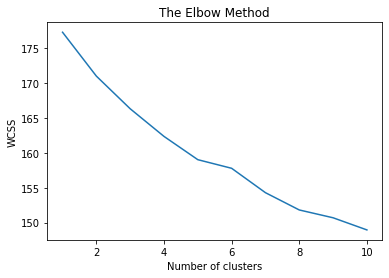

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3, n_init = 20) 
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


0 : the, you, to, are, i, is, for, we, this, video, it, and, a, glad, can, use, in, thank, your, on, help, that, do, with, not
1 : thank, for, lot, you, video, tune, stay, share, a, such, content, more, ghosh, awesom, veri, moinak, seri, cheer, brother, your, the, tutori, support, clarif, boss
2 : good, keep, awesom, work, nice, up, great, video, explan, quit, amaz, bro, it, job, one, moinak, insight, man, content, inform, like, price, superbbbb, superrrrrrr, uhh


In [22]:
# print("Prediction")

Y = vectorizer3.transform(data["Comment"].values)
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3=[],[],[]

for (i,j) in zip(prediction,data["Comment"].values):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "your site is safe for buying products please reply because I want to buy a drone kit",
  "Bro I have ordered DIY Peltier cooling kit how to track the package\nThank you",
  "Your web site real or fake please tell your service in Mumbai I am purchase",
  "Hello Sir! We are a 100% genuine website, and we are also the authorised resellers for Raspberry Pi, Arduino, Micro:Bit, M5Stack, ElecFreaks, SeeedStudio and Element14 in the country of India.\n\nWe deliver world-wide. We ship within 24 hours of receiving the order, and you should receive it in Mumbai pretty soon! :)",
  "Sir plzz send the mini dron making parts plzz I not mony iam realy fan for this robocraze",
  "I am not able to buy your receiver and transmitter for rc car in amazon because it is out of stock please make it available for me",
  "Bro I contacted you I will order sume product but I not cancel it please help me bro",
  "can i use it for bose 2.1 and any warranty available?",
  "Is it still available with you?",
  

0    110
2     57
1     26
Name: prediction, dtype: int64

In [23]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

print(count)
# print(json.dumps(questions, indent = 2, ensure_ascii = False))

[50, 0, 3]


In [24]:
kmeans = KMeans(n_clusters = 5, n_init = 20)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : the, to, i, you, is, a, and, for, use, it, with, can, your, ble, thank, of, on, how, nano, me, this, not, explan, arduino, awesom
1 : thank, for, share, you, video, cheer, brother, the, lot, awesom, clarif, nice, seri, ghosh, a, moinak, fix, fpgas, found, forc, got, footprint, flyski, float, give
2 : good, keep, up, work, nice, awesom, bro, it, job, great, tutori, one, veri, moinak, excel, go, motu, content, man, explain, and, congrat, verri, few, simpl
3 : are, you, glad, tune, stay, for, we, more, content, such, video, thank, enjoy, this, help, seri, your, lot, support, tutori, hi, the, us, like, our
4 : video, the, to, in, you, this, check, impuls, uhh, edg, our, great, do, super, nice, see, link, com, can, cli, instal, how, not, blog, post


In [ ]:
print("Prediction")

Y = vectorizer3.transform(data["Comment"].values)
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5=[],[],[],[],[]

for (i,j) in zip(prediction,data["Comment"].values):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")

ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

Prediction
[
  "your site is safe for buying products please reply because I want to buy a drone kit",
  "Bro I have ordered DIY Peltier cooling kit how to track the package\nThank you",
  "Your web site real or fake please tell your service in Mumbai I am purchase",
  "Hello Sir! We are a 100% genuine website, and we are also the authorised resellers for Raspberry Pi, Arduino, Micro:Bit, M5Stack, ElecFreaks, SeeedStudio and Element14 in the country of India.\n\nWe deliver world-wide. We ship within 24 hours of receiving the order, and you should receive it in Mumbai pretty soon! :)",
  "Sir plzz send the mini dron making parts plzz I not mony iam realy fan for this robocraze",
  "excellent work",
  "I am not able to buy your receiver and transmitter for rc car in amazon because it is out of stock please make it available for me",
  "Flysky i6 at 4600 and CT-6B at 3400",
  "Discount code kaha se mile ga",
  "https://robocraze.com/pages/deals"
] 


[
  "Too much noise in the video backg

0    115
1     45
3     15
4      9
2      9
Name: prediction, dtype: int64

In [31]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

# count1=0
# for i in c4:
#     z=i.lower()
#     if any(q in z for q in que):
#         count1+=1
# count.append(count1)

# count1=0
# for i in c5:
#     z=i.lower()
#     if any(q in z for q in que):
#         count1+=1
# count.append(count1)

print(count)

[50, 0, 3]


In [32]:
kmeans = KMeans(n_clusters = 6, n_init = 20)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : thank, you, zip, flyski, ftw, from, frequenc, freelanc, fpgas, found, forc, for, footprint, float, function, fix, first, firmwar, find, final, file, field, few, featur, full
1 : keep, up, it, good, awesom, work, tutori, job, bro, one, great, moinak, nice, verri, congrat, few, video, nano, the, garenti, first, for, footprint, got, flyski
2 : are, you, glad, we, enjoy, video, this, like, help, seri, our, the, thank, that, more, for, subscrib, tune, stay, hi, tutori, content, word, kind, found
3 : stay, tune, lot, for, thank, content, more, a, such, support, your, motiv, video, us, seri, boss, dutur, pleas, what, excit, in, updat, this, grate, veri
4 : the, to, you, for, thank, i, video, is, and, good, a, it, work, nice, use, can, great, this, how, in, with, your, on, of, ble
5 : awesom, explan, stuff, work, video, thank, for, the, float, freelanc, fpgas, found, forc, footprint, flyski, first, fix, from, firmwar, find, final, file, field, few, featur


In [ ]:
print("Prediction")

Y = vectorizer3.transform(data["Comment"].values)
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5,c6=[],[],[],[],[],[]

for (i,j) in zip(prediction,data["Comment"].values):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    elif i == 5:
        c6.append(j)

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c6[:10], indent = 2, ensure_ascii = False),"\n\n")

ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

In [33]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me

questions = []
for i in data["Comment"]:
    z=i.lower()
    if any(q in z for q in que):
        questions.append(i)
        
print(len(questions))
print(json.dumps(questions, indent = 2, ensure_ascii = False))

53
[
  "Bro I have ordered DIY Peltier cooling kit how to track the package\nThank you",
  "Your web site real or fake please tell your service in Mumbai I am purchase",
  "Hello Sir! We are a 100% genuine website, and we are also the authorised resellers for Raspberry Pi, Arduino, Micro:Bit, M5Stack, ElecFreaks, SeeedStudio and Element14 in the country of India.\n\nWe deliver world-wide. We ship within 24 hours of receiving the order, and you should receive it in Mumbai pretty soon! :)",
  "Sir rassburypi 4 is have returned garenty",
  "Hello Sir! The MRP of the kit is Rs 20,000/-. We do offer bulk discounts on purchase of 10 kits & more. :)",
  "Would you please upload the Proteus file to your drive because the wires you have connected from other components to Arduino are a little bit confusing in that final design so please upload it .",
  "very nice sir, please show me how to make schematic with imported schematic from orcad dsn file.",
  "I have already made cnn audio classificati